In [2]:
from IPython.display import display, Markdown, Latex

from analyse import deviation
from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

p = Page(ticker=Ticker.CAC2PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)

var = deviation(close=4813, volatility=24, period=1, precision=0)  # mercredi à l'ouverture
print('{}'.format(var))
sd = [var['1']['min'], var['1']['max']]
print('Variation : {}'.format(var['1']))
g=Graph(var['2']['min'], var['2']['max'], 1, sd)

{'1': {'min': 4740.0, 'max': 4886.0}, '2': {'min': 4667.0, 'max': 4959.0}, 'sd': 73.0}
Variation : {'min': 4740.0, 'max': 4886.0}


In [11]:
price = 4813
def atm(price, options):
    strikes = [o.strike for o in options]
    atm = round(price / 25, 0) * 25
    doptions = dict(zip(strikes, options))
    return doptions[atm]
atm(price, put.values())

Put(4825.0)

In [3]:
g.display_page_raw(p)

Settl.C,OIC,Day Vol C,Last C,bid C,ask C,C,strike,P,bid P,ask P,Last P,Day Vol P,OIP,Settl.P
615.28,-,-,-,620.90,630.9,C,4200,P,1.8,3,-,-,-,2.73
417.36,-,-,-,423.30,432.3,C,4400,P,3.7,4.9,4.50,1,-,4.83
320.2,-,-,-,326.10,334.1,C,4500,P,5.3,7.8,5.30,20,-,7.68
226.04,-,-,-,234.10,241.1,C,4600,P,10.4,13.4,11.00,5,-,13.52
181.95,-,-,-,187.40,193.4,C,4650,P,15.4,18.4,-,-,-,19.44
140.35,-,-,-,145.10,151.1,C,4700,P,23.1,26.1,-,-,2,27.84
121.04,-,-,-,125.20,131.2,C,4725,P,27.8,31.8,-,-,-,33.53
103.03,-,-,-,106.50,112.5,C,4750,P,34,38,-,-,-,40.53
86,-,-,-,89.50,94.5,C,4775,P,40.7,44.7,-,-,-,48.5
70.56,-,-,-,73.30,78.3,C,4800,P,49.3,53.3,47.70,30,-,58.06


In [ ]:
help(PutSpread)
pspread1 = PutSpread(put[5150], put[5000])
print('{} Cost : {}'.format(pspread1.label, pspread1.cost()))
g.profit_strategy(pspread1)
pspread2 = PutSpread(put[5150], put[5100])
print('{} Cost : {}'.format(pspread2.label, pspread2.cost()))
g.profit_strategy(pspread2)
g.compare(pspread1, 'long', pspread2, 'long')



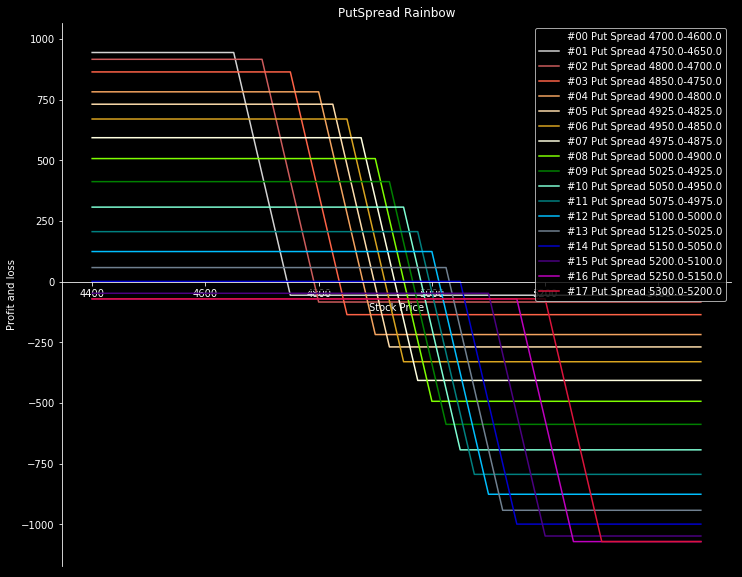

In [23]:
pss = PutSpread.explorator(put.values(), step=100)
g.profit_rainbow(pss, 'long', title='PutSpread Rainbow')

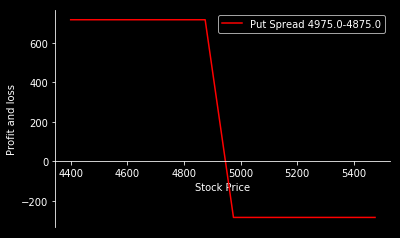

Category,strike,direction,Quantity,Cost,Premium
Put,4975,long,1,290,29
Put,4875,short,1,-6,-0.6


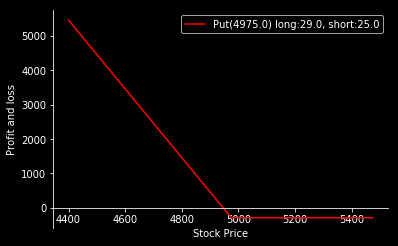

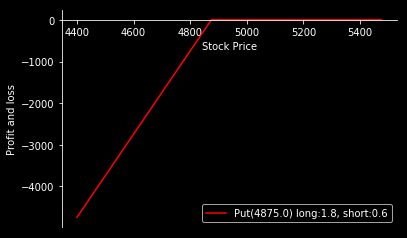

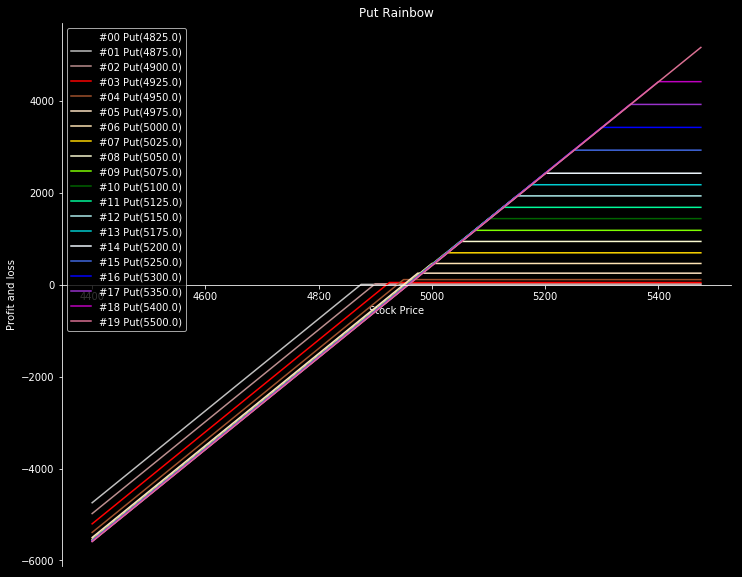

In [20]:
g.profit(pss[1], 'long')
g.display_summary(pss[1])
#g.profit(pss[4], 'long')
#g.display_summary(pss[4])
pss[13].payoff(np.array([5200]), 'long')
for o in pss[1].options:
    g.profit(o['option'], o['direction'])
g.profit_rainbow(put.values(), 'short', title='Put Rainbow')

In [ ]:
css = CallSpread.explorator(call.values(), step=25)
g.profit_rainbow(css, 'long', title='CallSpread Rainbow')

In [ ]:
g.profit(css[1], 'long')

In [ ]:
g.display_summary(css[1])
-3308 + 200 +1307

In [ ]:
o = css[1].options[0]
print('{}'.format(o['option'].payoff(g.sT, o['direction'])))
g.profit(o['option'], o['direction'])
o = css[1].options[1]
print('{}'.format(o['option'].payoff(g.sT, o['direction'])))
g.profit(o['option'], o['direction'])

In [ ]:
for e in o['option'].payoff(g.sT, o['direction']):
    print('{}'.format(e))

In [ ]:
s_payoff = css[1].payoff(g.sT, 'long')
o = css[1].options[0]
c1_payoff = o['option'].payoff(g.sT, o['direction'])
print(o['direction'])
o = css[1].options[1]
c2_payoff = o['option'].payoff(g.sT, o['direction'])
print(o['direction'])


In [ ]:
g.display_summary(css[1])

for strike, i, j, k in zip(g.sT, c1_payoff, c2_payoff, s_payoff):
    print('{}  {} + {} = {}'.format(strike, i, j, k))

In [ ]:
call[5150].achat

In [ ]:
css = [None, CallSpread(call[5150], call[5250])]

In [ ]:
css

In [ ]:
import numpy as np
sT = g.sT
strike = 5150
premium = 73.2
multiplier = 10
(np.where(sT > strike, sT - strike, 0) - premium) * multiplier

In [ ]:
sT


In [ ]:
np.where(sT > strike, sT - strike, 0)

In [ ]:
np.where(sT > strike, sT - strike, 0) - premium

In [ ]:
arr = \
[sT,
 np.where(sT > strike, sT - strike, 0)
 (np.where(sT > strike, sT - strike, 0) - premium),
 (np.where(sT > strike, sT - strike, 0) - premium) * multiplier]

In [ ]:
for i, s in enumerate(arr[0]):
    print('{} {} {} {}'.format(s, arr[1][i], arr[2][i], arr[3][i]))

In [ ]:
call[5150].payoff(sT, 'long')